# the random walk algorithm examined

### Resources: 
+ https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/random.htm
+ https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/

In [84]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import normalize

In [4]:
# the original function by Felix: 

'''
Random Walk Operator with restart probability.
Return Matrix.
''' 
def rnd_walk_matrix2(A, r, a, num_nodes):

    num = 1*num_nodes
    n = num_nodes
    factor = float((1-a)/n)

    E = np.multiply(factor,np.ones([n,n]))              # prepare 2nd scaling term
    A_tele = np.multiply(a,A) + E  #     print(A_tele)
    M = normalize(A_tele, norm='l1', axis=0)                                 # column wise normalized MArkov matrix

    # mixture of Markov chains
    del A_tele
    del E

    U = np.identity(n,dtype=int) 
    H = (1-r)*M
    H1 = np.subtract(U,H)
    del U
    del M
    del H    

    W = r*np.linalg.inv(H1)   

    return W

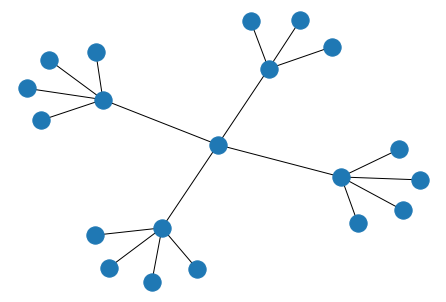

In [90]:
# TREE GRAPH as toy network 

organism = 'tree'
n = 20 # number of nodes
branch = 4 # branching factor
G = nx.full_rary_tree(branch, n)
nx.draw(G)

In [111]:
A = nx.adjacency_matrix(G)
A_ = A.toarray()

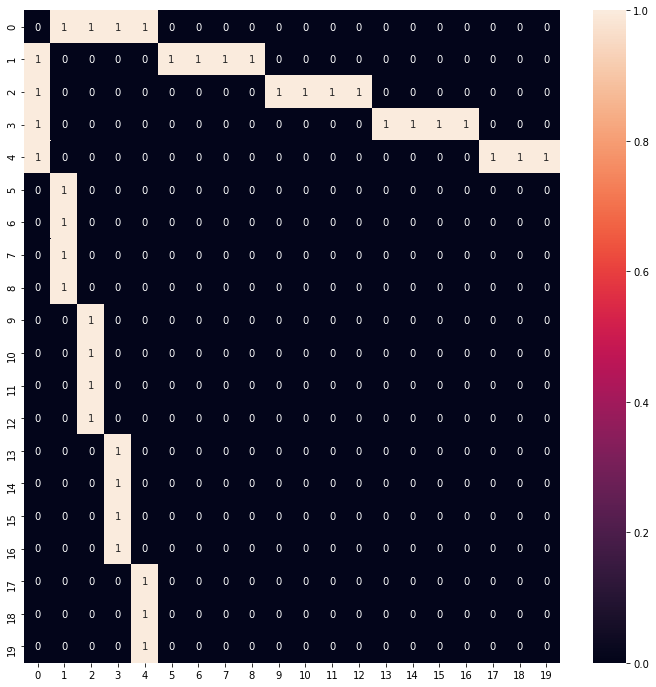

In [112]:
df_A = pd.DataFrame(A_)

plt.figure(figsize=(12,12))
sns.heatmap(df_A, annot=True)

In [116]:
a = 0.9
r = 0.8 

factor = float((1-a)/n)

E = np.multiply(factor,np.ones([n,n]))     # prepare 2nd scaling term
A_tele = np.multiply(a,A) + E              # print(A_tele)
M = normalize(A_tele, norm='l1', axis=0)   # column wise normalized MArkov matrix

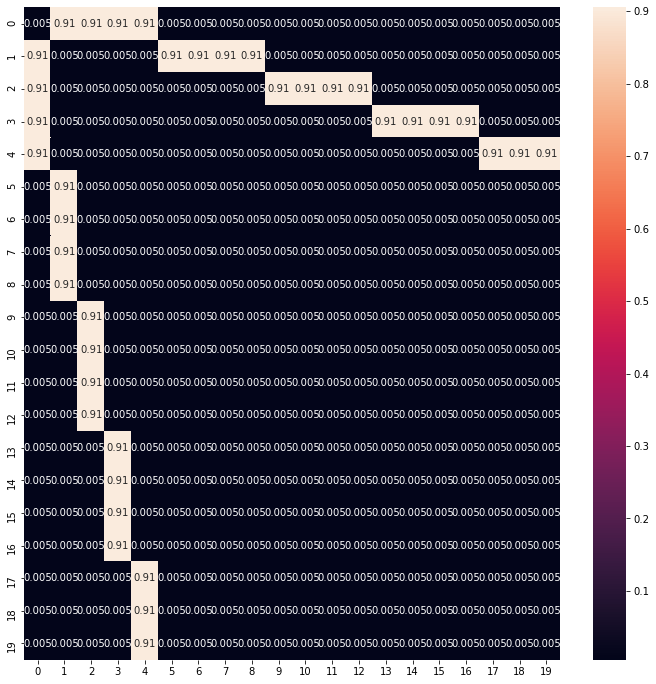

In [117]:
df_A_tele = pd.DataFrame(A_tele)

plt.figure(figsize=(12,12))
sns.heatmap(df_A_tele, annot=True)

In [103]:
U = np.identity(n,dtype=int) 
H = (1-r)*M
H1 = np.subtract(U,H)

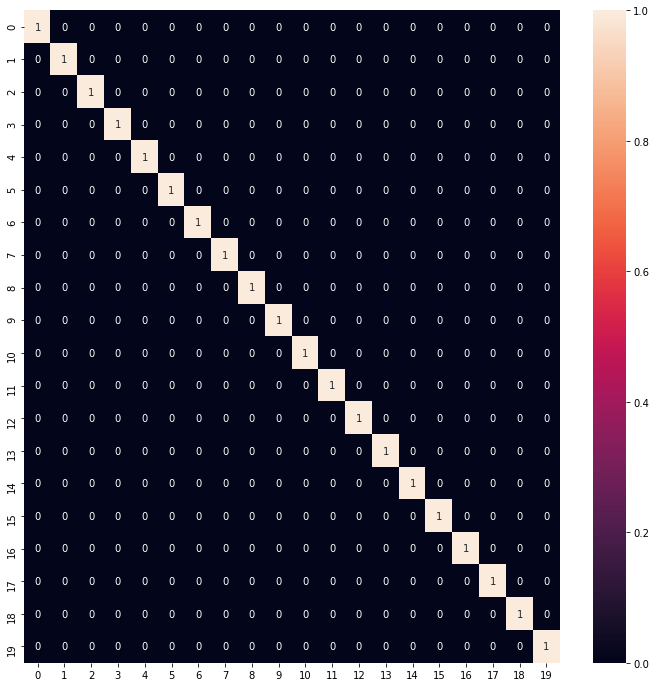

In [118]:
df_U = pd.DataFrame(U)

plt.figure(figsize=(12,12))
sns.heatmap(df_U, annot=True)

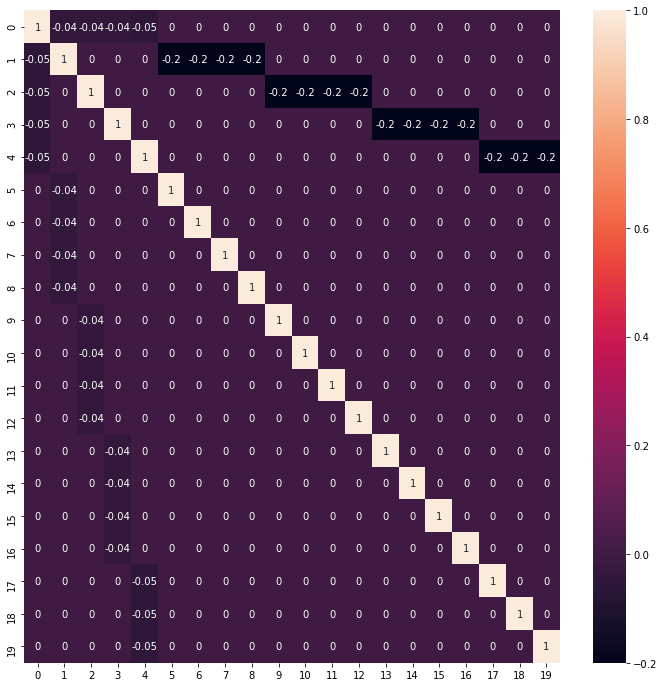

In [105]:
df_H = pd.DataFrame(H)
df_H1 = pd.DataFrame(H1)

plt.figure(figsize=(12,12))
sns.heatmap(df_H1, annot=True)

In [107]:
W = r*np.linalg.inv(H1)  

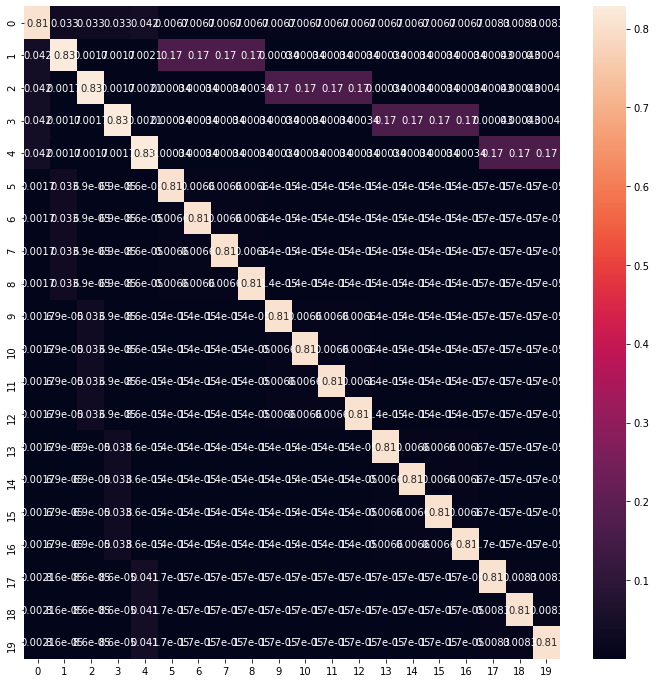

In [108]:
plt.figure(figsize=(12,12))

df_W = round(pd.DataFrame(W),6)
sns.heatmap(df_W, annot=True)